In [1]:
import numpy as np 
import pandas as pd
from urllib import request

%matplotlib inline
pd.options.mode.chained_assignment = None #to avoid SettingWithCopyWarning
import matplotlib.pyplot as plt

import seaborn as sns 

from dateutil.parser import parse
from datetime import date
import calendar
import matplotlib.dates as mdates
import matplotlib.patches as mpatches

import scipy.stats as st
from scipy.stats import norm

# Exploratory analysis of sales and shrinkage

### Abstract
Current report contains work with the dataset provided by "CODE" university partner "Metronom". "Metronom" is a part of the huge German retailer company "Metro". The data contains information from the one German store. Time interval of the data set - is a period between 1st to 31th of January 2020. Data could not be shared openly due to non-disclosure agreement. German is a main language of the data set.  

The main question of the report is how sales and shrinkage behave during the current period depending on the weekday, purchasing areas of products, freshness. Results were achieved by exploratory data analysis, visualizations with Python libraries and statistical methods. By exploring the target variables, we found that sales drop on Fridays, on contrary shrinkage takes the biggest part on Fridays. All products could be divided by the two main categories depending on their freshness: normal fresh (fresh) and ultrafresh. 58,9% of unique products belong to normal fresh and 41,1% belong to the ultrafresh (almost equal parts), but shrinkage for January 2020 contains a bigger part of the normal fresh products, then the ultrafresh products. Also, we explored products with the highest shrinkage and sales. It was proved that shrinkage and sales does not have any correlation. Sales variable has lognormal distribution and 75% of the sales are between 1 and 54 euros. Having these results would be important for further study of other time intervals and dependencies.

### Introduction

How do we find the main patterns of sales and shrinkage? Is there a relationship between shrinkage and sales? What are the products with the highest shrinkage?  We hypothesised that we could explore relationships between categorical and numerical variables and find dependencies. Following the step by step analyse process, we explored trends of sales and shrinkage by a day and by  a weekday and found that while sales drops on Fridays, shrinkage stays around 42% out of total.  Fresh and ultrafresh products take 56% and 44% of total sales and 73,6% and 26,4% of total shrinkage respectively. The top 3 products with the highest shrinkage take around 7% out of the total shrinkage and make only 0,58% of total sales which could be considered as the reason to give up on selling these products. Exploration of correlation metrics showed that there is no correlation between our target variables. In addition, we found that the most suitable theoretical distribution of the sales is positively skewed lognormal distribution and 75% of the sales values lay in the interval between 1 and 54 euros.

In order to achieve the goal we worked with different categories of data and used exploratory data analysis and statistical methods. Since the data was row - cleaning, consulting with the company data experts and finding a way to work with the missing values took a big part of the results. The structure of the analysis process is as follows: loading and preprocessing the data, cleaning the data, exploring the data. Since shrinkage is a very complex variable which depends on human factors, there is not enough information in the current data to tackle the problem of decreasing shrinkage so it could be considered as a target for further analysis.


### Data, materials and Methods

**Data**

The data set was provided by one of the biggest german retail companies __["METRO"](https://www.metro.de/)__ . It contains information about products for the one german department store. Data could not be shared openly due to non-disclosure agreement

*Time interval of the data set* -  period between 1st to 31th of January 2020. 

*German* is a main language of the data set. Names of the columns were translated for more convenient work in the Loading and preprocessing the data. 

Translation of categories is as following: *ACM FLEISCH* - meat category, *ACM BACKWAREN* - bakery products category, *ACM FRISCHFISCH* - fresh fish category, *ACM MOLKEREIPRODUKTE* - dairy products category, *ACM KAESE* - cheese products category, *ACM FEINKOST* - delicatessen category, *ACM GOURVENIENCE* - the own brand of "Metro" category, *ACM WURST* - sausage category, *ACM OBST* - fruits category, *ACM GEMUESE* - vegetables category.

Each purchasing area is a part of 2 big categories divided by freshness. We have an information from "Metro" with following description:  ACM FLEISCH, ACM FRISCHFISCH, ACM GEMUESE, ACM BLUMEN, ACM OBST belong to "ultrafresh" category (5 purchasing areas) and rest of it belong to normal fresh. 

**Keywords**:

*Depo* is a B2B shop for the small businesses (HORECA): shops, cafes, restaurants.

*Shrinkage* is a waste of products due to different reasons such as theft, damage, spoilage.

*Freshness* is an attribute of the perceived quality of food.


**Reqired libraries:**
- __[Numpy](https://www.numpy.org/)__ ,
- __[Pandas](https://pandas.pydata.org/)__ ,
- __[Seaborn](https://seaborn.pydata.org/)__ ,
- __[Matplotlib](https://matplotlib.org/)__  ,
- __[SciPy](https://www.scipy.org/)__ ,
- __[SciPy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html)__ .


### Analysis

### i. Loading and preprocessing the data

In [2]:
filepath = "./data_metro.csv"
df = pd.read_csv(filepath, encoding = "ISO-8859-1", error_bad_lines=False,low_memory=False, sep="\t")

Current dataset contains 13 columns, most of them are stored as a string format. A few target columns have missing values.
We need to start cleaning the data.

In [3]:
df.columns

Index(['store_id', 'store_desc', 'CATMAN_BUY_DOMAIN_ID',
       'CATMAN_BUY_DOMAIN_DESC', 'PCG_MAIN_CAT_ID', 'PCG_CAT_ID',
       'PCG_CAT_DESC', 'PCG_SUB_CAT_ID', 'PCG_SUB_CAT_DESC', 'ART_NO',
       'ART_NAME', 'Bv NNEK', 'Bv Stk', 'Bestand Ist NNEK',
       'Bestand Ist Stück', 'WA Stück', 'Umsatz VK Netto', 'date_of_day',
       'DAY_DESC'],
      dtype='object')

Since we have raw data, column names need clarification and should be renamed to more accurately described.

In [4]:
df = df.rename(columns={"CATMAN_BUY_DOMAIN_ID": "purchasing_area_id", 
                   "CATMAN_BUY_DOMAIN_DESC" : "purchasing_area_description", 
                   "PCG_MAIN_CAT_ID" : "main_product_group_id",
                   "PCG_CAT_ID" : "product_group_category_id",
                   "PCG_CAT_DESC" : "product_group_category_description",
                   "PCG_SUB_CAT_ID" : "product_subgroup_category_id",
                   "PCG_SUB_CAT_DESC" : "product_subgroup_category_description",
                            "ART_NO": "article_number",
                            "ART_NAME":"article_name",
                   "Bv NNEK" : "daily_shrinkage_in_euros",
                   "Bv Stk" : "daily_shrinkage_in_pieces",
                   "Bestand Ist NNEK": "daily_stock_in_euros",
                   "Bestand Ist Stück": "daily_stock_in_pieces",
                   "WA Stück": "daily_sales_in_pieces",
                   "Umsatz VK Netto" : "daily_sales_in_euros"
                   
                  })
df.sample(1)

,store_id,store_desc,purchasing_area_id,purchasing_area_description,main_product_group_id,product_group_category_id,product_group_category_description,product_subgroup_category_id,product_subgroup_category_description,article_number,article_name,daily_shrinkage_in_euros,daily_shrinkage_in_pieces,daily_stock_in_euros,daily_stock_in_pieces,daily_sales_in_pieces,daily_sales_in_euros,date_of_day,DAY_DESC
463371,579,LIEFERDEPOT BERLIN,67,ACM GEMUESE,981,1,Fruchtgemuese-Andere,31,Kuerbis,978097,KUERBIS BISCHOFSMUETZE STCK,NaN,NaN,0.0,0.0,NaN,NaN,02.01.20,02.01.20 Don


The data dictionary provided with the dataset is as the following:

**store_id and store_desc** - number and name of the department store, we have got a data from one store; 

**purchasing_area_id** and **purchasing_area_description** - id and name of the main categories of products (11);

**product_group_category_id** and **product_group_category_description** - id and name of detailed categories of products (179);

**product_subgroup_category_id** and **product_subgroup_category_description** - id and name of  subcategories of products (773);

**article_number** and **article_name**- number (23845) and name (23003) of each product;

**daily_shrinkage_in_euros** and **daily_shrinkage_in_pieces** - shrinkage of each product in euros and in pieces;

**daily_stock_in_euros** and **daily_stock_in_pieces** - daily stock of each product in euros and in pieces;

**daily_sales_in_euros** and **daily_sales_in_pieces** - daily sales of each product in euros and in pieces;

**date_of_day** - date (YYYY-MM-DD)

**DAY_DESC** - date in a different format (DD.MM.YY Weekday)

We are going to study different product categories to familiarize ourselves with them.

In [5]:
len(df["purchasing_area_description"].unique().tolist())

11

There are 11 purchasing areas of products.

In [6]:
len(df["product_group_category_description"].unique())

179

There are 179 product categories.

In [7]:
len(df["product_subgroup_category_description"].unique().tolist())

773

There are 773 product subcategories. 

Is there the same amount of article numbers as article names?
First, there are 738671 rows in total. Now let's check how many unique article numbers and related products in the data set.

In [8]:
array_of_art_num = df["article_number"].unique().tolist()
len(array_of_art_num)

23845

Now we check number of names of the product.

In [9]:
array_of_art_name = df["article_name"].unique().tolist()
len(array_of_art_name)

23003

We got less product names then article numbers. This question was clarified with the company data analyst. It is happening because sometimes the same products has the different article numbers (different taste, flavour and so on). For current report we will use article name.

## ii. Cleaning the data

First, we explore types of data to find obvious issues.

In [10]:
df.dtypes

store_id                                   int64
store_desc                                object
purchasing_area_id                         int64
purchasing_area_description               object
main_product_group_id                      int64
product_group_category_id                  int64
product_group_category_description        object
product_subgroup_category_id               int64
product_subgroup_category_description     object
article_number                             int64
article_name                              object
daily_shrinkage_in_euros                  object
daily_shrinkage_in_pieces                float64
daily_stock_in_euros                     float64
daily_stock_in_pieces                    float64
daily_sales_in_pieces                    float64
daily_sales_in_euros                     float64
date_of_day                               object
DAY_DESC                                  object
dtype: object

Exploring the types of data frame, we identified several problems that need to be solved in order to continue working with data:
* daily_shrinkage_in_euros has an object type;
* categorical columns have an object type;
* date_of_day has an object type.

In [11]:
df["daily_shrinkage_in_euros"].replace(',','.',inplace = True, regex = True)
df[["daily_shrinkage_in_euros"]] = df[["daily_shrinkage_in_euros"]].apply(pd.to_numeric)
df["daily_shrinkage_in_euros"].dtype

dtype('float64')

In [12]:
for col in ["purchasing_area_description", "product_group_category_description", "product_subgroup_category_description", "article_name"]:
    df[col] = df[col].astype("category")

The date is represented by two columns “date_of_day” and “DAY_DESC”. We decided to use the date_of_day column and, in addition to changing the type, extract additional information about the days of the week and save it in a new column.

In [13]:
df["date_of_day"]=pd.to_datetime(df["date_of_day"], format="%d.%m.%y")

Now, when the column "date_of_day" has a datetime type, we can extract information about weekdays. This is going to be an important column for the explorational part of the report later.

In [14]:
df['weekday'] = df["date_of_day"].dt.dayofweek.apply( lambda x: calendar.day_name[x])
df['weekday'] = df['weekday'].astype('category')
df.dtypes

store_id                                          int64
store_desc                                       object
purchasing_area_id                                int64
purchasing_area_description                    category
main_product_group_id                             int64
product_group_category_id                         int64
product_group_category_description             category
product_subgroup_category_id                      int64
product_subgroup_category_description          category
article_number                                    int64
article_name                                   category
daily_shrinkage_in_euros                        float64
daily_shrinkage_in_pieces                       float64
daily_stock_in_euros                            float64
daily_stock_in_pieces                           float64
daily_sales_in_pieces                           float64
daily_sales_in_euros                            float64
date_of_day                              datetim

As a result of this part, we fixed types of data, but we have some data which is not going to be useful for our report.

#### Exploring the null values and redundant data.

There are columns with a redundant data which is not useful for our project. We can easily drop following colomns: 
- "store_id" and "store_desc", since we have data for only one store;
- "DAY_DESC", since we have enough information about date;
- purchasing_area_id, "main_product_group_id", "product_group_category_id", "product_subgroup_category_id", "article_number" columns do not have usefull information for the current report.

In [15]:
df = df.drop(["store_id","store_desc","DAY_DESC", "article_number", "purchasing_area_id","main_product_group_id", "product_group_category_id","product_subgroup_category_id"], axis = 1)

In [16]:
df.sample(1)

,purchasing_area_description,product_group_category_description,product_subgroup_category_description,article_name,daily_shrinkage_in_euros,daily_shrinkage_in_pieces,daily_stock_in_euros,daily_stock_in_pieces,daily_sales_in_pieces,daily_sales_in_euros,date_of_day,weekday
444821,ACM OBST,Obst-Exoten,Sonst.Exoten Obst,TAMARINDEN KI,NaN,NaN,0.0,0.0,NaN,NaN,2020-01-21,Tuesday


Now, when our data looks cleaner, we have to explore our rows on missing values. And decide which method we can use to work with them.

In [17]:
df.isnull().sum()

purchasing_area_description                   0
product_group_category_description            0
product_subgroup_category_description         0
article_name                                  0
daily_shrinkage_in_euros                 738074
daily_shrinkage_in_pieces                738074
daily_stock_in_euros                          0
daily_stock_in_pieces                         0
daily_sales_in_pieces                    724596
daily_sales_in_euros                     724596
date_of_day                                   0
weekday                                       0
dtype: int64

Target columns are "daily_shrinkage_in_euros" and "daily_sales_in_euros". There are 738074 null values (99%) for "daily_shrinkage_in_euros" and 724596 (98%) for daily_sales_in_euros. The main question here is how we can work with null values?

In [18]:
df[df["daily_shrinkage_in_euros"].isnull()== False].shape

(597, 12)

In [19]:
df[df["daily_sales_in_euros"].isnull()== False].shape

(14075, 12)

- There are 597 products that have values for shrinkage and 14075 products that have values for sales. We cannot follow the technique of dropping all null values. 
- Also we considered a method to estimate some of the missing values by exploring more deeply each product. For this, we checked a few products out of each purchasing area and did not find any pattern which we could use to estimate the missing values. Most of the products do not have a stable day by day record. We did not include massive exploration of each product into the following report, but in general we can use the following function to explore missing values in depth by each article name. 

In [20]:
gdf = df.groupby(["article_name"])
def countna(x):
    return (x.isna()).sum()
gdf.agg(['count', countna, 'size']).sample(1)

purchasing_area_description               \
                                         count countna size   
article_name                                                  
10kg MC ESSORANGEN                          31       0   31   

                   product_group_category_description               \
                                                count countna size   
article_name                                                         
10kg MC ESSORANGEN                                 31       0   31   

                   product_subgroup_category_description               \
                                                   count countna size   
article_name                                                            
10kg MC ESSORANGEN                                    31       0   31   

                   daily_shrinkage_in_euros  ... daily_sales_in_pieces  \
                                      count  ...                  size   
article_name                                 ...                         
10kg MC ESSORANGEN                        0  ...                    31   

                   daily_sales_in_euros              date_of_day               \
                                  count countna size       count countna size   
article_name                                                                    
10kg MC ESSORANGEN                    0    31.0   31          31       0   31   

                   weekday               
                     count countna size  
article_name                             
10kg MC ESSORANGEN      31       0   31  

[1 rows x 33 columns]

Function above has just approved that for most products there are missing values every day and that's why it is impossible to use any approach for estimation.
As a result, to drop data with missing values is not a good choice, because we lose the information and would have ended up with a very small dataset. 

We made the following decision to check how many columns have both "NaN" values for sales and for shrinkage and to drop the rows only in this case. After dropping NaN values, there are 14406 rows.

In [21]:
df = df.dropna(subset=["daily_shrinkage_in_euros", "daily_sales_in_euros"], how="all")
df.shape

(14406, 12)

We had a few consulting sessions with data analysts from "Metro". The main insights are as following:
- most of the data for shrinkage has been done by employees and has a human factors( wrong inputs);
- the reasons behind NaN values for "daily_shrinkage" and "daily_sales" is missing information which could be filled with zero values and interpreted as "not exist".

In [22]:
df["daily_sales_in_pieces"] = df["daily_sales_in_pieces"].fillna(0)
df["daily_sales_in_euros"] = df["daily_sales_in_euros"].fillna(0)
df["daily_shrinkage_in_pieces"] = df["daily_shrinkage_in_pieces"].fillna(0)
df["daily_shrinkage_in_euros"] = df["daily_shrinkage_in_euros"].fillna(0)

In addition, we discussed business logic behind shrinkage and came to the conclusion, that:
- shinkage could be only negative. So positive shrinkage is a mistake of the system or wrong input. 
- sales could be only positive and negative values is a mistake.

Let's determine what percentage of our data has invalid values.

In [23]:
len(df[df["daily_shrinkage_in_euros"] > 0])/df.shape[0]

0.0005553241704845203

In [24]:
len(df[df["daily_sales_in_euros"] < 0])/df.shape[0]

0.006455643481882549

We have explored only 8 rows with positive shrinkage and 93 rows with negative sales. Given that this is less then 1% of data, we will remove these rows.

In [25]:
df = df[df["daily_shrinkage_in_euros"] <= 0]
df = df[df["daily_sales_in_euros"] >= 0]
df.count()

purchasing_area_description              14305
product_group_category_description       14305
product_subgroup_category_description    14305
article_name                             14305
daily_shrinkage_in_euros                 14305
daily_shrinkage_in_pieces                14305
daily_stock_in_euros                     14305
daily_stock_in_pieces                    14305
daily_sales_in_pieces                    14305
daily_sales_in_euros                     14305
date_of_day                              14305
weekday                                  14305
dtype: int64

During the cleaning process, we have done the following steps:
1. changed data types for columns;
2. worked with the date column and extracted information about weekdays;
3. removed columns with redundant information;
4. Worked out rows with the null values by filling missing values for shrinkage in euros and sales in euros with zeroes.
5. removed rows with positive values for shrinkage and negative values for sales.

We have 14305 rows to analyse. 

## iii. Exploring the Data

#### Exploring trends of sales and shrinkage

We'll begin by exploring our trends of shrinkage and sales by each day during a given month. 

In [26]:
df_by_date= df.groupby("date_of_day")["daily_shrinkage_in_euros", "daily_sales_in_euros"].sum().reset_index()
df_by_date=df_by_date.set_index("date_of_day", drop=True, append=False, inplace=False)
df_by_date= df_by_date[df_by_date["daily_sales_in_euros"]>0]
df_by_date.sample(2)

,daily_shrinkage_in_euros,daily_sales_in_euros
date_of_day,,
2020-01-09,-1087.1503,29185.00
2020-01-07,-1708.7863,26127.23


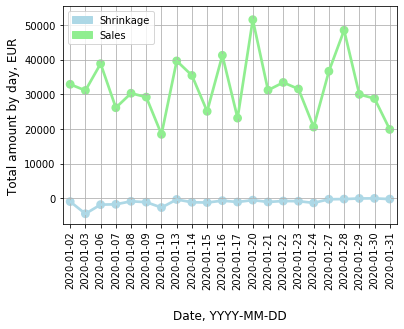

In [27]:
fig, ax = plt.subplots()

sns.pointplot( x=df_by_date.index,y='daily_shrinkage_in_euros',data=df_by_date,color='lightblue')
sns.pointplot( x=df_by_date.index, y='daily_sales_in_euros',data=df_by_date,color='lightgreen')
plt.xlabel('Date, YYYY-MM-DD',fontsize = 12, labelpad=20)
plt.ylabel('Total amount by day, EUR',fontsize = 12 )

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.gca().xaxis.set_major_formatter(plt.FixedFormatter(df_by_date.index.to_series().dt.strftime("%Y-%m-%d")))
shrinkage_patch = mpatches.Patch(color='lightblue', label='Shrinkage')
sales_patch = mpatches.Patch(color='lightgreen', label='Sales')
plt.legend(handles=[shrinkage_patch, sales_patch])
 
plt.grid()

*Figure 1. Trends of shrinkage, sales in euros between 1st and 31st of January 2020.* 

Figure 1 shows that shrinkage seems to stay almost the same low during a month. There is some bigger raise of shrinkage on the 2nd of January, it could be affected by holidays, probably we could assume that the store had a bigger amount of products for New Year holidays. Also Figure 1 shows sales drop on specific dates (10th, 17 th, 24th of January), it is Friday so we are guessing that there is some dependency on weekdays.

#### Exploring weekdays

On the previous step we assumed that sales depends on a weekday. We will explore the assumption more by creating  a new dataframe where the main variables are grouped by a weekday. Department store is not getting any input on Saturday and Sunday. 

In [28]:
arrange = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_by_weekday=df.groupby("weekday")["daily_shrinkage_in_euros","daily_sales_in_euros"].sum().reindex(arrange)
df_by_weekday.reset_index(inplace=True)
df_by_weekday = df_by_weekday.drop(index=[5, 6])
df_by_weekday["absolute_shrinkage"] = df_by_weekday["daily_shrinkage_in_euros"].apply(abs)
df_by_weekday

,weekday,daily_shrinkage_in_euros,daily_sales_in_euros,absolute_shrinkage
0,Monday,-2863.1071,166579.502,2863.1071
1,Tuesday,-4054.3495,141190.966,4054.3495
2,Wednesday,-2819.0344,118766.990,2819.0344
3,Thursday,-3477.4796,163614.560,3477.4796
4,Friday,-9617.0413,113097.963,9617.0413


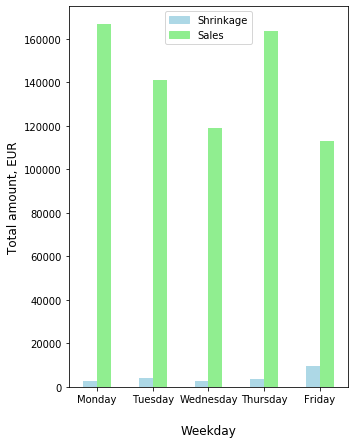

In [29]:
ax = df_by_weekday.plot.bar(x="weekday", y= ["absolute_shrinkage","daily_sales_in_euros"],color=["lightblue", "lightgreen"], rot=0, subplots=False, figsize=(5, 7))
plt.ylabel('Total amount, EUR',fontsize = 12,color='black')
plt.xlabel('Weekday',fontsize = 12, labelpad=20)
shrinkage_patch = mpatches.Patch(color = "lightblue", label='Shrinkage')
sales_patch = mpatches.Patch(color = "lightgreen", label='Sales')
plt.legend(handles=[shrinkage_patch, sales_patch])

*Figure 2. Total amount of shrinkage, sales in euros by weekday* 

Figure 2 proves that daily sales on Friday are less than other weekdays. The peak of sales takes place on Mondays and on Thursdays. To make a clear vision of sales and shrinkage, we will find a proportion by weekday. 

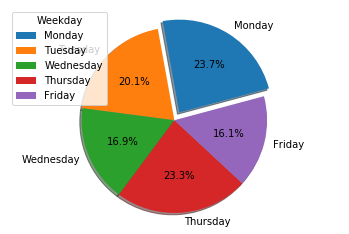

In [30]:
my_explode = (0.1, 0, 0, 0, 0)
plt.pie(df_by_weekday["daily_sales_in_euros"], labels=df_by_weekday['weekday'], autopct='%1.1f%%', startangle=15, shadow = True, explode=my_explode)
plt.axis('equal')
plt.legend(title="Weekday", loc='upper left', labels=df_by_weekday['weekday'], frameon=True, ncol=1)

*Figure 3. Proportion of sales by weekday* 

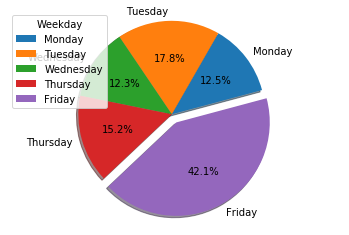

In [31]:
my_explode = (0, 0, 0, 0, 0.1)
plt.pie(df_by_weekday["absolute_shrinkage"], labels=df_by_weekday['weekday'], autopct='%1.1f%%', startangle=15, shadow = True, explode=my_explode)
plt.axis('equal')
plt.legend(title="Weekday", loc='upper left', labels=df_by_weekday['weekday'], frameon=True, ncol=1)

*Figure 4. Proportion of shrinkage by weekday* 

As a result, Figure 3 and Figure 4 shows that sales takes the biggest part on Mondays and on Thursdays, the least part on Fridays, on contrary shrinkage is reaching the highest value on Fridays (42,7%). 

#### Exploring freshness

In [32]:
df['freshness'] = 'fresh'
df['freshness'][df['purchasing_area_description'] == 'ACM FLEISCH'] = 'ultrafresh'
df['freshness'][df['purchasing_area_description'] == 'ACM FRISCHFISCH'] = 'ultrafresh'
df['freshness'][df['purchasing_area_description'] == 'ACM GEMUESE'] = 'ultrafresh'
df['freshness'][df['purchasing_area_description'] == 'ACM BLUMEN'] = 'ultrafresh'
df['freshness'][df['purchasing_area_description'] == 'ACM OBST'] = 'ultrafresh'

Now we have information about each product whether it belongs to the fresh or the ultrafresh category. 


In [33]:
df_freshness = df.groupby("freshness")["daily_shrinkage_in_euros", "daily_sales_in_euros" ].sum().reset_index()
df_freshness

,freshness,daily_shrinkage_in_euros,daily_sales_in_euros
0,fresh,-16797.2265,394066.109
1,ultrafresh,-6034.9998,309183.872


Let's find proportions of fresh and ultra fresh products in the shrinkage (absolute values) and sales.

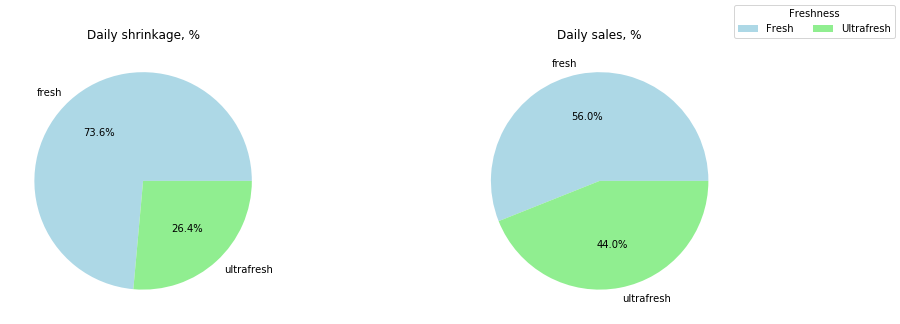

In [34]:
df_pie = pd.DataFrame({'fresh':[16797.2265,394066.109],
               'ultrafresh':[6034.9998, 309183.872],
               }, index=['daily_shrinkage_in_euros','daily_sales_in_euros' ])    
title= ['Daily shrinkage, %','Daily sales, %' ]
fig, axs = plt.subplots(nrows=1, ncols=df_pie.index.size, figsize=(15,5))
colors = ["lightblue","lightgreen"]
fig.subplots_adjust(hspace=1.5)


for row in range(df_pie.index.size):
    fig.add_subplot(axs[row] )
    plt.pie(df_pie.loc[df_pie.index[row],:], labels=df_pie.columns, autopct="%1.1f%%", colors=colors)
    axs[row].set_title(title[row])
fig.legend(title="Freshness", loc='upper right', labels=["Fresh", "Ultrafresh"], ncol=2)

*Figure 5. Proportion of Fresh and Ultrafresh products in shrinkage and sales* 

Figure 5 demonstrates that fresh products take the main part in shrinkage and sales. So following the data for only one month we can conclude that the current depo has less ultrafresh product then normal fresh.  We will also check how many unique products each group has and find out a proportion. 

In [35]:
df.groupby("freshness")["article_name"].nunique()

freshness
fresh         1026
ultrafresh     716
Name: article_name, dtype: int64

In [36]:
df.groupby("freshness")["article_name"].nunique()/df["article_name"].nunique() * 100

freshness
fresh         58.897819
ultrafresh    41.102181
Name: article_name, dtype: float64

58,9% of unique products belong to normal fresh and 41,1% belong to the ultrafresh (almost equal parts).

On this step, we found out that shrinkage for January 2020 contains a bigger part of the normal fresh products, then the ultrafresh products.

#### Exploring the top best-selling products 

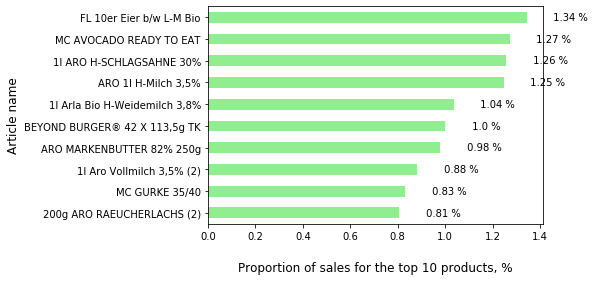

In [37]:
df_by_name_top_sale = df.groupby("article_name")["daily_sales_in_euros","daily_shrinkage_in_euros"].sum().reset_index()
df_by_name_top_sale["% out of total sales"]= (df_by_name_top_sale["daily_sales_in_euros"]/df_by_name_top_sale["daily_sales_in_euros"].sum())* 100

df_by_name_top_sale = df_by_name_top_sale.nlargest(10, ["daily_sales_in_euros"])
df_by_name_top_sale.set_index("article_name", inplace=True, drop="true")

ax = df_by_name_top_sale["% out of total sales"][:10].plot.barh(color="lightgreen")
plt.xlabel("Proportion of sales for the top 10 products, %", fontsize = 12, labelpad=20);
plt.ylabel("Article name", fontsize = 12,);

for patch in ax.patches:
    ax.text(
        patch.get_width() + 0.1, 
        patch.get_y() + 0.38,
        " {} %".format(patch.get_width().round(2)), 
        fontsize=10,
        color='black'
    )

ax.invert_yaxis()

*Figure 6. Top 10 best-selling Products in the department store for January 2020*

Based on the sales of products across different categories in the department store, the top 10 best selling products are shown on Figure 6:

1. 10er Eier b/w L-M BIO
2. MC AVOCADO 
3. 1L ARO H-SCHLAGSAHNE

....

Top 10 best-selling products in the department store for January 2020 make almost 11% of total sales. 

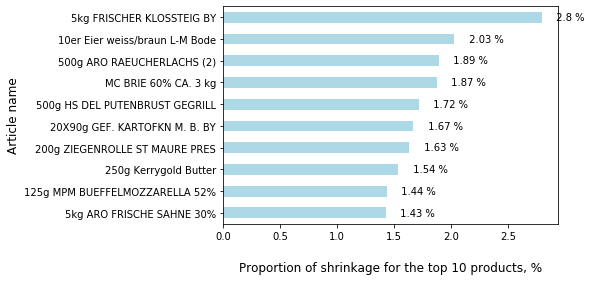

In [38]:
df_by_name_top_shrinkage = df.groupby("article_name")["daily_shrinkage_in_euros"].sum().reset_index()
df_by_name_top_shrinkage["% out of total shrinkage"]= (df_by_name_top_shrinkage["daily_shrinkage_in_euros"]/df_by_name_top_shrinkage["daily_shrinkage_in_euros"].sum())* 100
df_by_name_top_shrinkage = df_by_name_top_shrinkage.nsmallest(10, ["daily_shrinkage_in_euros"])
df_by_name_top_shrinkage.set_index("article_name", inplace=True, drop="true")

ax = df_by_name_top_shrinkage["% out of total shrinkage"][:10].plot.barh(color="lightblue")
plt.xlabel("Proportion of shrinkage for the top 10 products, %", fontsize = 12, labelpad=20);
plt.ylabel("Article name", fontsize = 12);
for patch in ax.patches:
    ax.text(
        patch.get_width() + 0.1, 
        patch.get_y() + 0.38,
        " {} %".format(patch.get_width().round(2)), 
        fontsize=10,
        color='black'
    )

ax.invert_yaxis()

*Figure 7. Top 10 products with the highest shrinkage in the department store for January 2020*

Based on the shrinkage of products across different categories in the department store, the top 10 products with highest shrinkage are shown on Figure 7:

1. 5 kg Frischer Kloßteig
2. 10er Eier weiss/braun L-M
3. 500g ARO RAEUCHERLACHS

...

These 10 products make up around 18% of total shrinkage. 
Let's explore only the first three products with the highest shrinkage and find out what is the proportion of these products in sales.

In [39]:
df_new=df.groupby("article_name")["daily_sales_in_euros"].sum().reset_index()
top_3 = ["5kg FRISCHER KLOSSTEIG BY","10er Eier weiss/braun L-M Bode", "500g ARO RAEUCHERLACHS (2)"]
for product in top_3:
    print(df_new.loc[df_new["article_name"] == product])

                   article_name  daily_sales_in_euros
7257  5kg FRISCHER KLOSSTEIG BY                 192.0
                       article_name  daily_sales_in_euros
815  10er Eier weiss/braun L-M Bode                2026.0
                    article_name  daily_sales_in_euros
6248  500g ARO RAEUCHERLACHS (2)                1869.0


In [40]:
print(sum([192, 2026, 1869])/df_new["daily_sales_in_euros"].sum() *100)

0.5811589207849548


Top 10 best-selling products in the department store for January 2020 make almost 11% of total 

As a conclusion, the top 3 products with the highest shrinkage take around 7% out of total shrinkage and make 0,58% of total sales. As a suggestion to "Metro", to check the reasons for such a high shrinkage of these products and these products could be removed from the store.

#### Exploring the main category of products

In [41]:
df["purchasing_area_description"].unique().tolist()

['ACM FLEISCH',
 'ACM BACKWAREN',
 'ACM FRISCHFISCH',
 'ACM MOLKEREIPRODUKTE',
 'ACM KAESE',
 'ACM FEINKOST',
 'ACM GOURVENIENCE',
 'ACM WURST',
 'ACM OBST',
 'ACM GEMUESE']

AMC BLUMEN has no any record.

In [42]:
df_areas = df.groupby("purchasing_area_description")["daily_sales_in_euros","daily_shrinkage_in_euros"].sum().drop(index="ACM BLUMEN").reset_index()
df_areas

,purchasing_area_description,daily_sales_in_euros,daily_shrinkage_in_euros
0,ACM BACKWAREN,14102.000,-199.9313
1,ACM FEINKOST,25170.000,-3371.1331
2,ACM FLEISCH,123057.865,-2184.6305
3,ACM FRISCHFISCH,28823.007,-1256.6433
4,ACM GEMUESE,102817.000,-2363.5960
5,ACM GOURVENIENCE,2502.810,0.0000
6,ACM KAESE,125558.000,-3716.3172
7,ACM MOLKEREIPRODUKTE,164432.299,-4353.7868
8,ACM OBST,54486.000,-230.1300
9,ACM WURST,62301.000,-5156.0581


Let's explore purchasing areas in depth.

Text(0.5, 1.0, 'Shrinkage in EUR by purchasing areas')

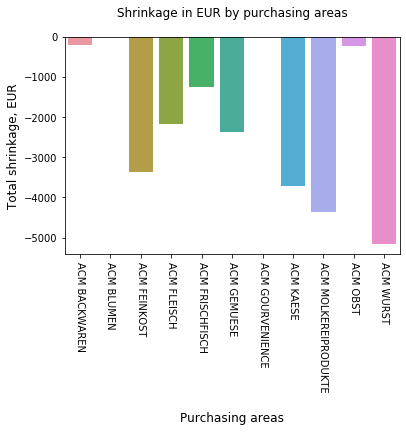

In [43]:
sns.barplot(data = df_areas, x = "purchasing_area_description", y = "daily_shrinkage_in_euros")
plt.xticks(rotation=-90)
plt.xlabel("Purchasing areas",  fontsize = 12, labelpad=20);
plt.ylabel("Total shrinkage, EUR", fontsize = 12);
plt.title('Shrinkage in EUR by purchasing areas', pad=20,color="black")

*Figure 8. Total shrinkage in euros by purchasing area*

Areas with the highest shrinkage (following the Figure 8): ACM WURST, ACM MOLKEREIPRODUKTE and ACM KAESE, areas with the lowest shrinkage is ACM OBST and ACM BACKWAREN. 
ACM  GOURVENIENCE does not have shrinkage. It is the own brand of "Metro", so it could be that the shrinkage counts in a different way.

Text(0.5, 1.0, 'Sales in EUR by purchasing areas')

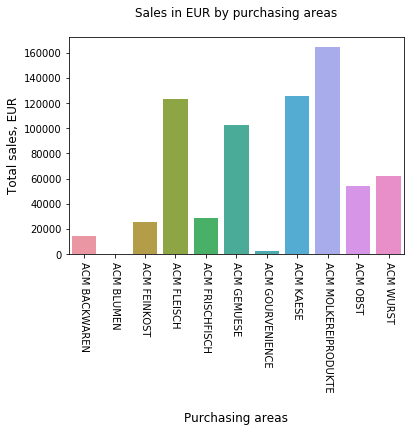

In [44]:
sns.barplot(data = df_areas, x = "purchasing_area_description", y = "daily_sales_in_euros")
plt.xticks(rotation=-90)
plt.xlabel("Purchasing areas",  fontsize = 12, labelpad=20);
plt.ylabel("Total sales, EUR",  fontsize = 12);
plt.title('Sales in EUR by purchasing areas', pad=20,color="black")

*Figure 9. Total sales in euros by purchasing area*

The areas with the highest sales(following Figure 9): ACM MOLKEREIPRODUKTE, ACM KAESE and ACM FLEISCH and with the lowest sales ACM BACKWAREN and ACM GOURVENIENCE which is similar to shrinkage.

Let's explore sales by category by plotting boxplot.

(0, 400)

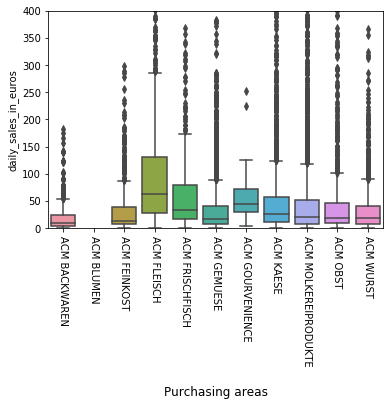

In [45]:
sns.boxplot(x = df["purchasing_area_description"], y = df["daily_sales_in_euros"])
plt.xticks(rotation=-90)
plt.xlabel("Purchasing areas",  fontsize = 12, labelpad=20);
plt.ylim(0,400)

*Figure 10. Statistical visualisation of the sales by the main categories of products*

Using statistical visualisation of the sales by the main categories of products (Figure 10) we found that we have a lot of outliers. After the research of the topic, it was clarified that it is normal for the real data sets. Here we can see that median is the best average measure for our data set. We can infer from Figure 10 that the highest average of total sales takes the ACM FLEISCH category(63 EUR). We can conclude, that despite the fact that ACM MOLKEREIPRODUKTE has the highest total sales,  ACM Fleish category has the biggest normalised max values.

#### Finding correlation

The last step is to make a conclusion about correlation between the target variables.

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]), <a list of 6 Text yticklabel objects>)

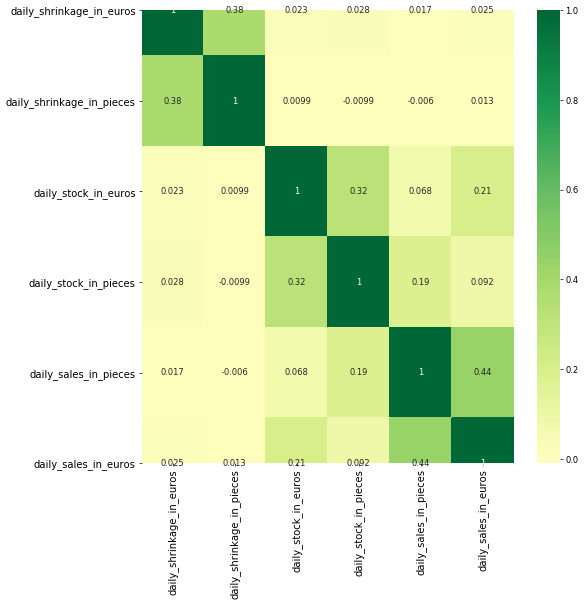

In [46]:
plt.figure(figsize=(10,10), dpi= 60)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

*Figure 11. The correllogram with correlation coefficients of all possible pairs of numeric variable*

Figure 11 doesn’t indicate that there’s any strong correlation, because the correlation coefficient of all possible pairs of numeric variables is less than 0.30. Correlation coefficient for sales in euros and shrinkage in euros is +0,025 which is very close to 0. We could prove the absence of correlation by plot (Figure 12) 

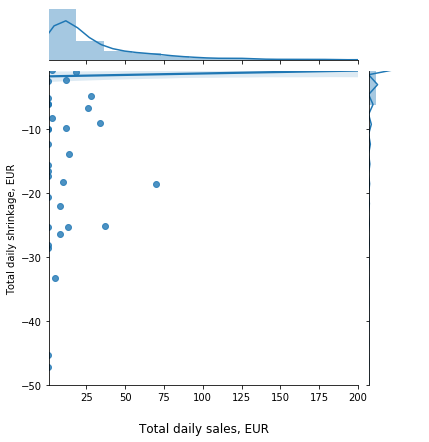

In [47]:
sns.jointplot(x="daily_sales_in_euros" , y="daily_shrinkage_in_euros",kind="reg", data=df.sample(1000));
plt.ylim([-50,-1]) 
plt.xlim([1,200])
plt.xlabel("Total daily sales, EUR", fontsize = 12, labelpad=20);
plt.ylabel("Total daily shrinkage, EUR");

*Figure 12. Visualisation of relationship between sales and shrinkage*

The histogram on the top of Figure 12 shows the distribution of the total sales. Distribution is positively skewed (mean = 49 is greater than the median = 21).

As the last step of the report, let's find what theoretical distribution is the most suitable to describe our sales data? First, let's test sales distributions with a python method and find which distribution fits.

In [48]:
data = df["daily_sales_in_euros"]
distributions = [st.alpha,st.beta,st.gamma,st.laplace,st.lognorm,st.pearson3,st.norm]
mles = []
for distribution in distributions:
    pars = distribution.fit(data)
    mle = distribution.nnlf(pars, data)
    mles.append(mle)
results = [(distribution.name, mle) for distribution, mle in zip(distributions, mles)]
best_fit = sorted(zip(distributions, mles), key=lambda d: d[1])[0]
print("Best fit for sales variable reached using {}".format(best_fit[0].name, best_fit[1]))

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2381: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:515: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Best fit for sales variable reached using lognorm


Logarithm of the sales variables is normally distributed (Figure 13). We have skewed distribution with low mean values, large variance, and all-positive values 

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 0, "log10('daily_sales_in_euros')")

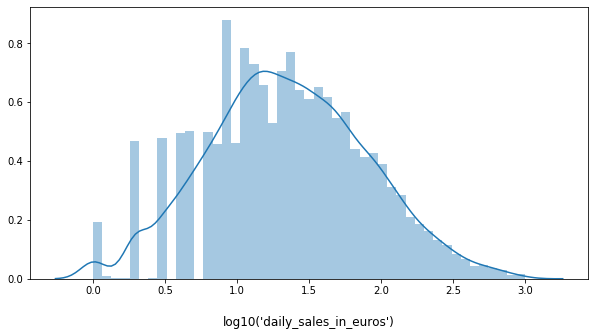

In [49]:
plt.figure(figsize=(10,5))
x = np.log10(df["daily_sales_in_euros"])
x = x[np.isfinite(x)]
ax = sns.distplot(x, kde=True)
plt.xlabel("log10('daily_sales_in_euros')",fontsize = 12, labelpad=20)

Figure 13. Normal distribution of logarithm of the sales variables .

Now, we can plot lognormal distribution of sales.

(0, 120)

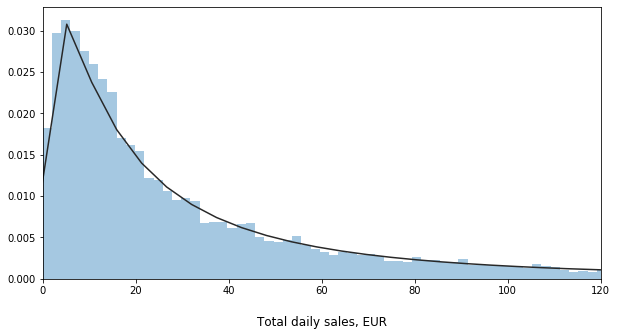

In [50]:
plt.figure(figsize=(10,5))
ax = sns.distplot(df["daily_sales_in_euros"], fit=st.lognorm, kde=False, bins=500)
plt.xlabel("Total daily sales, EUR", fontsize = 12, labelpad=20);
plt.xlim(0, 120)

*Figure 14. Visualizing sales lognorm distribution.*

In [51]:
x = df[df["daily_sales_in_euros"] > 0]
np.quantile(x["daily_sales_in_euros"], 0.75)

54.0

As a conclusion, during the last step, we explored shrinkage and sales relation and could not find any correlation. Sales in euros have lognormal distribution, we proved it by plotting normal distribution of logarithm. 75% of the sales are between 1 and 54 euros.

### Conclusion
By the current exploratory process, we answered all questions that were asked at the beginning of the report and found following:
- sales drops on Fridays, while shrinkage raises to 42% out of total on Fridays,
- fresh and ultrafresh products take 56% and 44% of total sales and 73,6% and 26,4% of total shrinkage respectively,
- the top 3 products with the highest shrinkage take around 7% out of the total shrinkage and make only 0,58% of total sales,
- there is no correlation between the sales and shrinkage,
- the most suitable theoretical distribution of the sales is positively skewed lognormal distribution and 75% of the sales values lay in the interval between 1 and 54 euros.

Also, we made a good ground for further exploration of a longer period of time and tackling problems of shrinkage. Since shrinkage is a very complex and unstable variable, it needs more data from the company and work on site.